In [1]:
import pandas as pd
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [57]:
from src.simulate import make_detections, plot_detections, plot_cam_dets, in_footprint_2D

In [4]:
import matplotlib.pyplot as plt

In [42]:
num_inds = 10
speed_var = 0.1
size=5

# area = [0,size,0,size]
timesteps = 50

footprint = 1
cam_step = 0.3
y_steps=2

In [32]:
df[["individual"] + ["x_{}".format(i) for i in range(50)] + ["y_{}".format(i) for i in range(50)]]

,individual,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,y_40,y_41,y_42,y_43,y_44,y_45,y_46,y_47,y_48,y_49
0,0,3.346234,3.360791,3.222653,3.111813,3.092767,3.078914,3.000421,3.052097,3.043613,...,3.366641,3.177893,3.209077,3.281775,3.478325,3.602156,3.490829,3.223828,3.232024,3.183254
1,1,4.175204,4.234402,4.202177,4.169267,4.261747,4.265555,4.127561,4.085801,4.059724,...,1.799225,1.893913,1.786843,1.806223,1.979527,1.995969,2.058767,1.987007,2.167207,2.057665
2,2,0.655021,0.694859,0.575088,0.670059,0.656784,0.622518,0.641028,0.641930,0.479274,...,2.610331,2.717970,2.576735,2.640215,2.517201,2.426237,2.547068,2.693405,2.575566,2.623973
3,3,2.330806,2.299672,2.287169,2.264306,2.315722,2.386036,2.435921,2.479061,2.316754,...,1.469966,1.578148,1.588104,1.617742,1.515245,1.342558,1.478252,1.440694,1.375176,1.453072
4,4,2.403372,2.497077,2.700918,2.575040,2.566781,2.694339,2.518220,2.489209,2.467253,...,4.538984,4.579603,4.551566,4.484445,4.513091,4.282252,4.230023,4.261931,4.298757,4.286556
5,5,1.519604,1.584442,1.687466,1.484790,1.503951,1.393158,1.478686,1.466753,1.355312,...,-0.492716,-0.486396,-0.395540,-0.364589,-0.422872,-0.487443,-0.435139,-0.451231,-0.541106,-0.466202
6,6,3.824130,3.704523,3.659559,3.434676,3.390203,3.338034,3.359105,3.283200,3.185007,...,5.860149,5.740617,5.712879,5.689593,5.538415,5.536673,5.663281,5.711255,5.588863,5.507224
7,7,3.100811,3.332003,3.471048,3.521578,3.560722,3.601932,3.561319,3.428917,3.427062,...,0.481692,0.457066,0.392397,0.350216,0.624269,0.674123,0.573099,0.629695,0.416771,0.451112
8,8,4.823481,4.663810,4.738855,4.732050,4.769877,4.699131,4.693880,4.814752,4.900020,...,0.756900,0.672469,0.683380,0.683269,0.736458,0.825672,0.859824,0.885547,0.873999,0.799617
9,9,3.209235,3.008217,3.066854,3.141417,3.216518,3.189551,3.180436,3.227707,3.309310,...,2.356261,2.252757,2.352371,2.543513,2.522640,2.708523,2.846083,2.825120,2.894268,2.949891


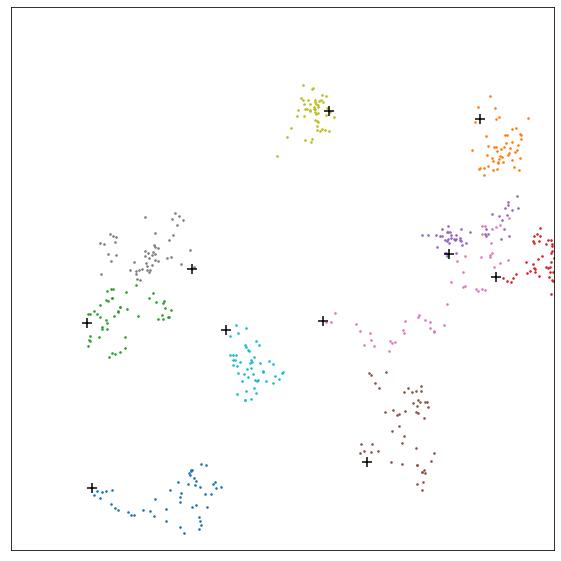

In [44]:
df = make_detections(num_inds, speed_var, size, timesteps)
fig = plot_detections(df, size, timesteps, stp=1)
# fig = plot_detections(df[["individual"] + ["x_{}".format(i) for i in range(51)]+ ["y_{}".format(i) for i in range(51)]], size, 50, stp=1)

In [49]:
fig.savefig("../figs/positions.png")
df.to_csv("../figs/positions.csv", index=False)

Make vehicle track

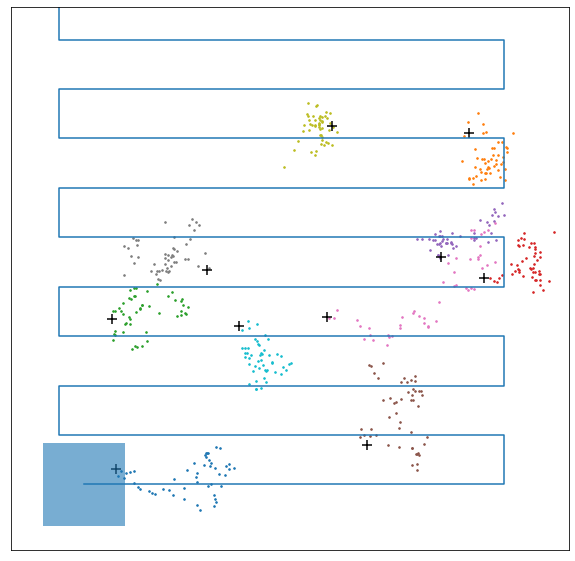

In [54]:
fig, ax, camx, camy = plot_cam_dets(df,size, footprint, cam_step, plot_less=timesteps, y_steps=y_steps, stp=1)

In [50]:
fig.savefig("../figs/positions+track.png")

**Make detections figure**

Detections are where the individual is inside the camera at the given timestep

In [56]:
df

,individual,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,...,x_46,y_46,x_47,y_47,x_48,y_48,x_49,y_49,x_50,y_50
0,0,0.395287,0.183475,0.485332,0.077020,0.556975,0.151880,0.455734,0.157480,0.416522,...,1.729886,0.226792,1.820691,0.196779,1.642008,0.121212,1.661570,-0.022914,1.547612,0.003133
1,1,4.674497,4.264784,4.619575,4.228639,4.659631,4.395371,4.785504,4.511939,4.841249,...,4.819413,3.794142,4.824663,3.699317,4.723195,3.717255,4.766099,3.740346,4.724148,3.645953
2,2,0.340532,2.013147,0.502829,1.945835,0.477636,1.854593,0.562553,1.943756,0.481808,...,0.623344,1.679921,0.650448,1.668888,0.757383,1.853934,0.705066,1.684124,0.766461,1.737672
3,3,4.855249,2.511761,4.982247,2.474558,4.929547,2.501457,5.021975,2.461687,5.041270,...,5.476389,2.478766,5.536670,2.416701,5.488911,2.476276,5.441204,2.517007,5.459849,2.331240
4,4,4.334737,2.766161,4.304502,2.781287,4.312702,2.913422,4.410753,2.935370,4.522704,...,4.956177,3.272781,4.976861,3.198548,4.986814,3.307077,5.083582,3.411945,5.104348,3.275123
5,5,3.433978,0.476503,3.480749,0.586789,3.489170,0.670941,3.355768,0.573295,3.364098,...,3.569217,1.287643,3.521660,1.351290,3.638470,1.472460,3.457251,1.455702,3.481931,1.438735
6,6,2.946867,2.032767,2.976954,2.022145,3.039891,2.023349,3.079531,2.116984,3.351706,...,4.699571,3.083291,4.704583,2.986205,4.816731,3.043600,4.905412,3.088878,4.998262,3.173226
7,7,1.499015,2.607141,1.473818,2.814242,1.380877,2.655993,1.523381,2.625874,1.268298,...,0.489336,2.893713,0.594565,2.992804,0.650096,2.904888,0.657962,2.962921,0.630629,2.972898
8,8,3.011133,4.349751,3.071568,4.279272,2.897542,4.460387,2.739833,4.421366,2.723670,...,2.669405,4.358150,2.664576,4.293505,2.597205,4.165123,2.548203,4.060361,2.434422,3.851758
9,9,1.880904,1.929261,2.100351,1.948928,2.007627,1.902887,1.989778,1.986097,1.915753,...,2.202150,1.811936,2.128931,1.697495,2.100413,1.739208,1.957741,1.655476,1.990747,1.651868


In [81]:
def check_in_cam(tstep, cx, cy, fprint, dfin):
    hfp = fprint/2
    cxt = camx[tstep]
    cyt = cy[timestep]
    return dfin[(dfin["x_{}".format(tstep)].between(cxt-hfp, cxt+hfp)) & (dfin["y_{}".format(tstep)].between(cyt-hfp, cyt+hfp))][["individual", "x_{}".format(tstep), "y_{}".format(tstep)]]
    
    

In [87]:
for i in range(100):
    cdf = check_in_cam(i, camx, camy, footprint, df)
    if len(cdf)!=0:
        print(cdf.head())

   individual       x_0       y_0
0           0  0.395287  0.183475
   individual       x_1      y_1
0           0  0.485332  0.07702
   individual       x_2      y_2
0           0  0.556975  0.15188
   individual       x_3      y_3
0           0  0.455734  0.15748
   individual      x_12      y_12
5           5  4.047209  0.250928
   individual      x_13     y_13
5           5  4.041293  0.17054
   individual      x_14      y_14
5           5  3.981635  0.234099
   individual     x_15     y_15
5           5  4.03666  0.36614
   individual      x_30     y_30
0           0  1.363875  0.08974
   individual      x_31      y_31
0           0  1.459239  0.230506
   individual      x_32      y_32
0           0  1.469189  0.357682
   individual      x_44      y_44
0           0  1.588539  0.203629
   individual      x_45     y_45
0           0  1.764611  0.18486
   individual      x_46      y_46
0           0  1.729886  0.226792
   individual      x_47      y_47
0           0  1.820691  0.196

KeyError: 'x_51'

In [69]:
half_fp = footprint/2

timestep = 0

camxt = camx[timestep]
camyt = camy[timestep]

for ind in df["individual"]:
    if in_footprint_2D(camxt, 
                       camyt, 
                       footprint, 
                       df[df["individual"]==ind]["x_{}".format(timestep)], 
                       df[df["individual"]==ind]["y_{}".format(timestep)]):
        print(ind)

0


KeyError: 0

In [67]:
df[df["individual"]==ind]["x_{}".format(timestep)][0]

0.39528684534889114

In [68]:
df[df["individual"]==ind]["y_{}".format(timestep)][0]

0.18347455535434987

In [80]:
df[(df["x_0"].between(camxt-half_fp, camxt+half_fp)) & (df["y_0"].between(camyt-half_fp, camyt+half_fp))][["individual", "x_0", "y_0"]]

,individual,x_0,y_0
0,0,0.395287,0.183475
